# Machine Learning Regression Model

In [41]:
???

Object `?` not found.


Classification Model | Regression Model
-|-
![](src/pred_classification.png) | ![](src/pred_regression.png)

## [ ] Load the data

In [42]:
import pandas as pd

df = pd.read_excel('data/Microsoft_LinkedIn_Processed.xlsx', parse_dates=['Date'], index_col=0)
df

,Open,High,Low,Close,Volume,change_tomorrow,change_tomorrow_direction
Date,,,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800,1.549143,UP
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400,0.321692,UP
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100,1.286112,UP
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900,-0.478622,DOWN
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700,-0.159789,DOWN
...,...,...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400,-1.500467,DOWN
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800,2.099087,UP
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700,2.634307,UP


## Machine Learning Model

### Separate the data

1. Target: which variable do you want to predict?
2. Explanatory: which variables will you use to calculate the prediction?

In [43]:
target = df.change_tomorrow
explanatory = df[['Open','High','Low','Close','Volume']]

In [44]:
target

Date
2016-12-08    1.549143
2016-12-09    0.321692
2016-12-12    1.286112
2016-12-13   -0.478622
2016-12-14   -0.159789
                ...   
2023-03-09   -1.500467
2023-03-10    2.099087
2023-03-13    2.634307
2023-03-14    1.751806
2023-03-15    3.895731
Name: change_tomorrow, Length: 1576, dtype: float64

In [45]:
explanatory

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-08,56.325228,56.582507,55.902560,56.058762,21220800
2016-12-09,56.214968,56.959234,56.169027,56.940857,27349400
2016-12-12,56.803028,57.244073,56.711145,57.124622,20198100
2016-12-13,57.427836,58.273172,57.188938,57.868881,35718900
2016-12-14,57.887258,58.300739,57.455399,57.593227,30352700
...,...,...,...,...,...
2023-03-09,255.820007,259.559998,251.580002,252.320007,26653400
2023-03-10,251.080002,252.789993,247.600006,248.589996,28321800
2023-03-13,247.399994,257.910004,245.729996,253.919998,33339700


### Compute the model

The following model will predict the **numerical increase** of the stock for the following day.

As the variable we predict is numerical, we talk about regression models. In the previous tutorial, we used a classification model since the variable we predicted was categorical (UP or DOWN).

[Text(0.9266334954946319, 0.96875, 'Volume <= 92951148.0\nsquared_error = 3.341\nsamples = 1576\nvalue = 0.084'),
 Text(0.8655369296395705, 0.90625, 'Volume <= 91578148.0\nsquared_error = 3.212\nsamples = 1572\nvalue = 0.074'),
 Text(0.8960852125671013, 0.9375, 'True  '),
 Text(0.8624694449769938, 0.84375, 'Volume <= 87003952.0\nsquared_error = 3.022\nsamples = 1571\nvalue = 0.085'),
 Text(0.7433437979294478, 0.78125, 'Volume <= 78979100.0\nsquared_error = 2.99\nsamples = 1569\nvalue = 0.08'),
 Text(0.5142949578220859, 0.71875, 'Volume <= 78451200.0\nsquared_error = 2.969\nsamples = 1560\nvalue = 0.091'),
 Text(0.5112274731595092, 0.65625, 'Open <= 262.304\nsquared_error = 2.927\nsamples = 1559\nvalue = 0.086'),
 Text(0.3008052147239264, 0.59375, 'Volume <= 46663750.0\nsquared_error = 2.867\nsamples = 1293\nvalue = 0.14'),
 Text(0.2093558282208589, 0.53125, 'Volume <= 39176800.0\nsquared_error = 2.357\nsamples = 1192\nvalue = 0.187'),
 Text(0.1616180981595092, 0.46875, 'Open <= 260.32\

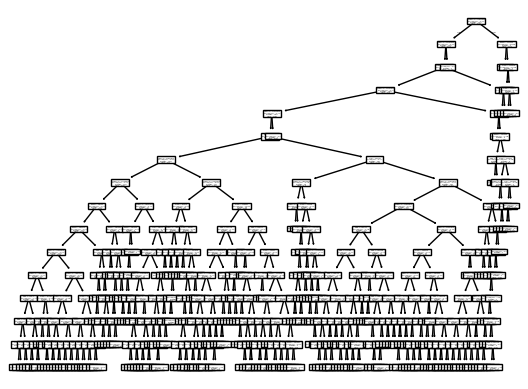

In [46]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
model_dt = DecisionTreeRegressor(max_depth=15)
model_dt.fit(X=explanatory, y=target)
plot_tree(decision_tree=model_dt, feature_names=model_dt.feature_names_in_)

### Calculate the predictions

In [47]:
y_pred = model_dt.predict(X=explanatory)
df_prediction = df[['change_tomorrow']].copy()
df_prediction['prediction'] = y_pred
df_prediction

,change_tomorrow,prediction
Date,,
2016-12-08,1.549143,0.081958
2016-12-09,0.321692,0.330148
2016-12-12,1.286112,0.081958
2016-12-13,-0.478622,0.206834
2016-12-14,-0.159789,0.206834
...,...,...
2023-03-09,-1.500467,-1.058574
2023-03-10,2.099087,0.420296
2023-03-13,2.634307,0.315103


### Evaluate the model: compare predictions with the reality

In [48]:
model_dt.score(X=explanatory, y=target)

0.5431115880820776

## [ ] How to interpret the error?

In [49]:
df_predictions = df[['change_tomorrow']].copy()

df_predictions['prediction'] = y_pred
df_predictions

,change_tomorrow,prediction
Date,,
2016-12-08,1.549143,0.081958
2016-12-09,0.321692,0.330148
2016-12-12,1.286112,0.081958
2016-12-13,-0.478622,0.206834
2016-12-14,-0.159789,0.206834
...,...,...
2023-03-09,-1.500467,-1.058574
2023-03-10,2.099087,0.420296
2023-03-13,2.634307,0.315103


In [50]:
df_predictions['error'] = df_predictions.prediction - df_predictions.change_tomorrow

<Axes: >

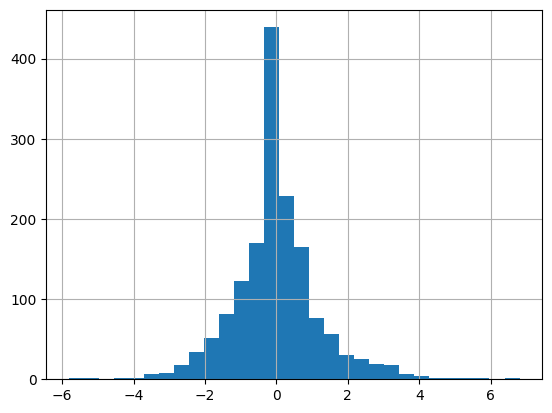

In [51]:
df_predictions.error.sum().round(2)
df_predictions['error2'] = df_predictions.error**2
sse = df_predictions.error2.sum()
mse = df_predictions.error2.mean()

import numpy as np
rmse = np.sqrt(mse)

df_predictions.error.hist(bins=30)

68 procent to je 2*34,1 bude v rozsahy tech 1.2 (rmse) procent chybovosti. Aktualni histogram odpovida normalnimu rozlozeni. RMSE je vlastna standart deviation. Any prediction our models do 68 procent of them will fall within a range of 1.2% and -1.2%  of the increase of the stock tomorrow 

To znema ze 95 procent dat bude pokryto v rozsahu -1.2% az 1,2% od spravne hdonoty 
zname jako confidence interval

In [52]:
rmse

np.float64(1.235524072739283)

The Standard Deviation of the Error|The Normal Distribution
-|-
![](src/std.png) | ![](src/std_normal.png)

source: wikipedia

## Save the model into a file

- We'll write the numbers of the Decision Tree's mathematical equation into a file.

In [53]:
import pickle

In [54]:
with open('models/model_dt_regression.pkl', 'wb') as f:
    pickle.dump(model_dt, f)